Aluno: Airton Silva Monteiro


Resolução Lista de Exercícios 

**Exemplo 2.14**:  
Dada a função $ f(x) = \frac{1}{2}x_{1}^2 + 2x_{2}^2 $ e seu gradiente  
$ \nabla f(x) = \begin{pmatrix}
x_1 \\
4x_2
\end{pmatrix} $,  
avalie no ponto $ x = \begin{pmatrix}
1 \\
1
\end{pmatrix} $.

In [1]:
#Importano dependências:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits import mplot3d
%matplotlib inline
from numpy import linalg as LA

In [2]:
def ex02_14(x):
    f = 0.5 * (x[0]**2) + 2 * (x[1]**2)
    g = np.array([x[0], 4*x[1]])
    return f,g

In [3]:
#Avaliar no ponto x solicitado:
x = np.array([1, 1])
f, g = ex02_14(x)
print("Função avaliada no ponto x:", f)
print("Gradiente avaliada no ponto x:", g)

Função avaliada no ponto x: 2.5
Gradiente avaliada no ponto x: [1 4]


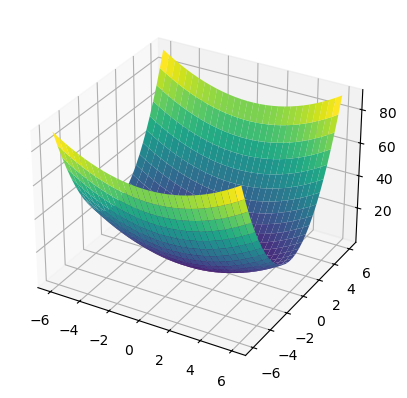

In [4]:
#Plotando a função:
def fct(x, y):
    f, g = ex02_14(np.array([x, y]))
    return f
meshx = np.linspace(-6, 6, 30)
meshy = np.linspace(-6, 6, 30)
X, Y = np.meshgrid(meshx, meshy)
Z = fct(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')


Investigar a função considerando três direções:

In [5]:
#Definindo Direções
d1 = -g
d2 = np.array([-1, -1])
d3 = np.array([1, -3])

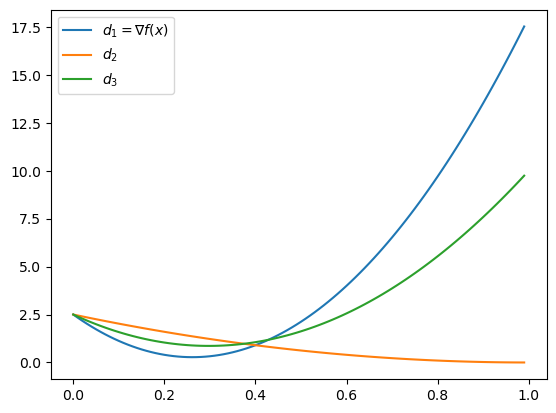

In [6]:
#Plot das funções considerando as três direções definidas
plotalpha = np.arange(0, 1, 0.01)
fig, ax = plt.subplots()
fx1 = np.array([ex02_14(x + alpha*d1)[0] for alpha in plotalpha])
fx2 = np.array([ex02_14(x + alpha*d2)[0] for alpha in plotalpha])
fx3 = np.array([ex02_14(x + alpha*d3)[0] for alpha in plotalpha])
plot1, plot2, plot3 = plt.plot(plotalpha, fx1, plotalpha, fx2, plotalpha, fx3)

ax.legend ((plot1, plot2, plot3), ('$d_1 = \\nabla f(x)$', '$d_2$', '$d_3$'), \
    loc='upper left') 

Calcular a derivada direcional de $f(x)$ avaliada em $x$ para cada direção determinada

In [7]:
def directional_derivative(g, direction):
    return np.dot(g, direction)

In [8]:
d_d1 = directional_derivative(g, d1)
d_d2 = directional_derivative(g, d2)
d_d3 = directional_derivative(g, d3)

print(d_d1)
print(d_d2)
print(d_d3)

-17
-5
-11


Vizualição gráfica 

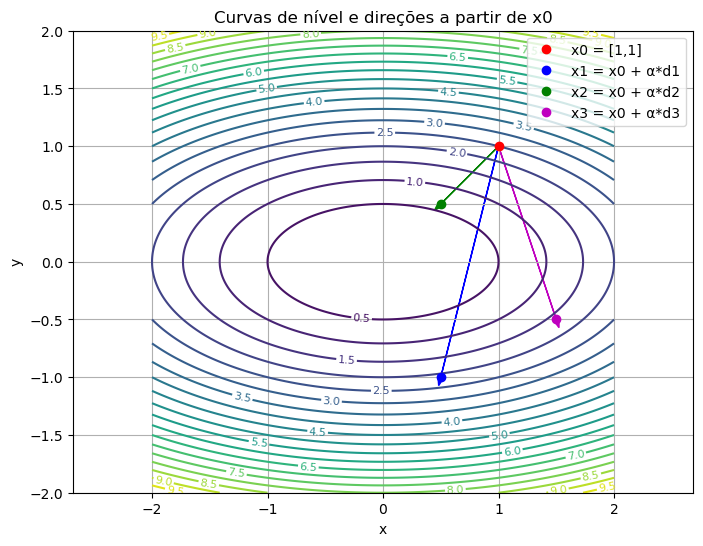

In [9]:
x0 = np.array([1.0, 1.0])
_, g, = ex02_14(x0)

alpha = 0.5

#As direções são as mesmas definidas anteriormente
x1 = x0 + alpha * d1
x2 = x0 + alpha * d2
x3 = x0 + alpha * d3

x_vals = np.linspace(-2, 2, 400)
y_vals = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = 0.5 * X**2 + 2.0 * Y**2

plt.figure(figsize=(8, 6))
contours = plt.contour(X, Y, Z, levels=20, cmap='viridis')
plt.clabel(contours, inline=True, fontsize=8)

plt.plot(x0[0], x0[1], 'ro', label='x0 = [1,1]')
plt.plot(x1[0], x1[1], 'bo', label='x1 = x0 + α*d1')
plt.plot(x2[0], x2[1], 'go', label='x2 = x0 + α*d2')
plt.plot(x3[0], x3[1], 'mo', label='x3 = x0 + α*d3')

plt.arrow(x0[0], x0[1], alpha * d1[0], alpha * d1[1], color='b', head_width=0.05)
plt.arrow(x0[0], x0[1], alpha * d2[0], alpha * d2[1], color='g', head_width=0.05)
plt.arrow(x0[0], x0[1], alpha * d3[0], alpha * d3[1], color='m', head_width=0.05)

plt.title('Curvas de nível e direções a partir de x0')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

**Exemplo 2.23**:


Para a função utilizada no exemplo $2.14$, definir sua curvatura:

In [10]:
#Definir a matrix hessiana da função
def hessian_ex02_14(x):
    h = np.array([[1, 0],[0, 4]])
    return h
    
x = np.array([1, 1])
h = hessian_ex02_14(x)


Para $d = \begin{pmatrix}
1 & 4
\end{pmatrix}^T$

In [11]:
d = np.array([1, 4])
(d @ h @ d) / (d @ d)

3.823529411764706

Para $d = \begin{pmatrix}
1 & 1
\end{pmatrix}^T$

In [12]:
d = np.array([1, 1])
(d @ h @ d) / (d @ d)

2.5

Para $d = \begin{pmatrix}
-1 & 1
\end{pmatrix}^T$

In [13]:
d = np.array([-1, 3])
(d @ h @ d) / (d @ d)

3.7

**Exemplo 2.31**



In [14]:
def ex02_31(x):
    f = 2*(x[0]**2) + 9*(x[1]**2)
    g = np.array([4*x[0], 18*x[1]])
    h = np.array([[4, 0], [0, 18]])

    return f, g, h

x0 = np.array([0., 0.])
_, _, h = ex02_31([0., 0.])

In [15]:
singular_values = np.linalg.svd(h, compute_uv=False)
condition_number = singular_values[0] / singular_values[-1]
condition_number

4.5

In [16]:
def ex02_31_b(x):
    f = 0.5*x[0]**2 + 0.5*x[1]**2
    g = np.array([1.0*x[0], 1.0*x[1]])
    h = np.array([[1.0, 0.0],[0.0, 1.0]])
    return f, g, h

_, _, h = ex02_31_b(x0)
singular_values = np.linalg.svd(h, compute_uv=False)
condition_number = singular_values[0] / singular_values[-1]
condition_number


1.0

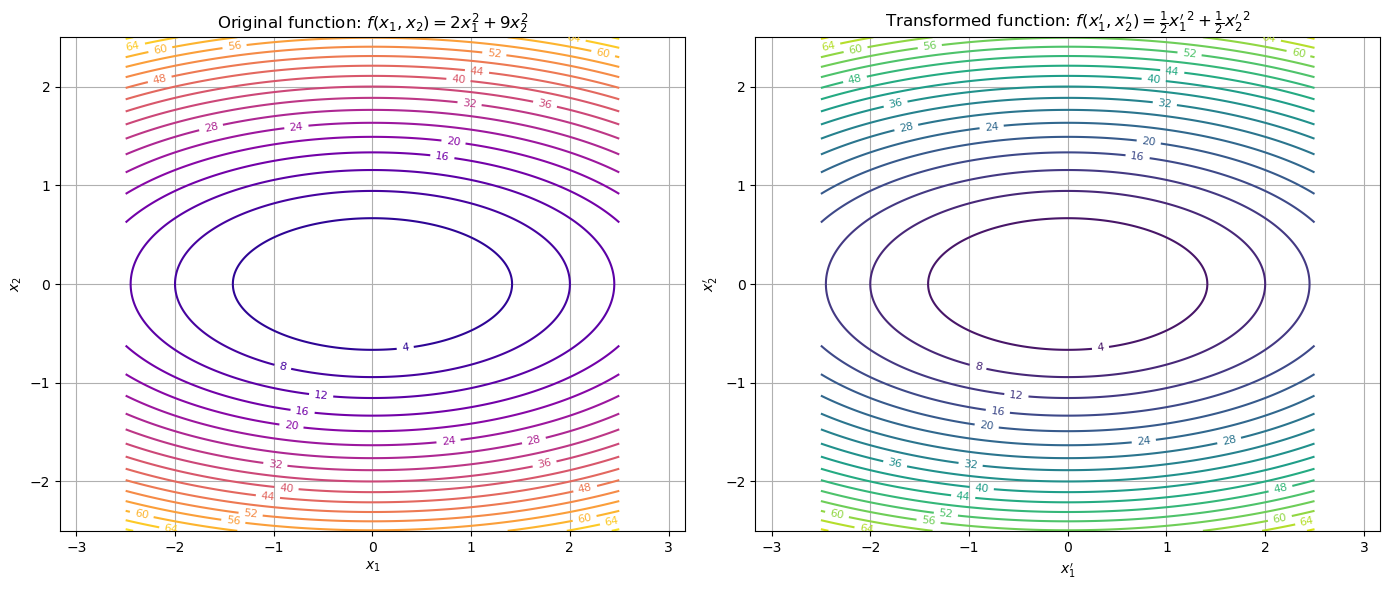

In [17]:
#Definir função original do exemplo 2.31
def f_0231_original(x1, x2):
    f = 2*(x1**2) + 9*(x2**2)
    return f

def f_transformed_0231(x1p, x2p):
    f = 0.5*x1p**2 + 0.5*x2p**2
    return f

# Grid
x_vals = np.linspace(-2.5, 2.5, 400)
y_vals = np.linspace(-2.5, 2.5, 400)
X, Y = np.meshgrid(x_vals, y_vals)

Z_orig = f_0231_original(X, Y)

#Mudança de Variável
X1p = 2 * X
X2p = 3 * np.sqrt(2) * Y

Z_transf = f_transformed_0231(X1p, X2p)

#Plot
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

#Plot de função original
cs1 = axs[0].contour(X, Y, Z_orig, levels=20, cmap='plasma')
axs[0].clabel(cs1, inline=True, fontsize=8)
axs[0].set_title("Original function: $f(x_1, x_2) = 2x_1^2 + 9x_2^2$")
axs[0].set_xlabel('$x_1$')
axs[0].set_ylabel('$x_2$')
axs[0].axis('equal')
axs[0].grid(True)

#Plot da função transformada
cs2 = axs[1].contour(X, Y, Z_transf, levels=20, cmap='viridis')
axs[1].clabel(cs2, inline=True, fontsize=8)
axs[1].set_title("Transformed function: $f(x_1', x_2') = \\frac{1}{2}x_1'^2 + \\frac{1}{2}x_2'^2$")
axs[1].set_xlabel("$x_1'$")
axs[1].set_ylabel("$x_2'$")
axs[1].axis('equal')
axs[1].grid(True)

plt.tight_layout()
plt.show()

In [18]:
x0 = np.array([2.0, 2.0])#ponto de partida
x_origem = [x0.copy()]
x = x0.copy()
alpha = 0.1 #numero do passo
steps = 20 #numero de iterações

#Gradiente da função original
def gradiente_f_original(x):
    g = np.array([4.0 * x[0], 18.0 * x[1]])
    return g

for _ in range(steps):
    x = x - alpha*gradiente_f_original(x)
    x_origem.append(x.copy())
x_origem = np.array(x_origem)

#Propor a mudança de coordenadas x' = T x
T = np.array([[2.0, 0.0], [0.0, 3.0 * np.sqrt(2)]])
T_inv = np.linalg.inv(T)
    

In [19]:
x0p = T @ x0
def gradiente_transf(xp):
    return np.array([xp[0], xp[1]])

x_transf = [x0p.copy()]
x = x0p.copy()
for _ in range(steps):
    x = x - alpha * gradiente_transf(x)
    x_transf.append(x.copy())
x_transf = np.array(x_transf)

C:\Users\airto\AppData\Local\Temp\ipykernel_15172\932900325.py:11: UserWarning: The following kwargs were not used by contour: 'level'
  cs1 = axs[0].contour(X, Y, Z_orig, level=20, cmap='plasma')


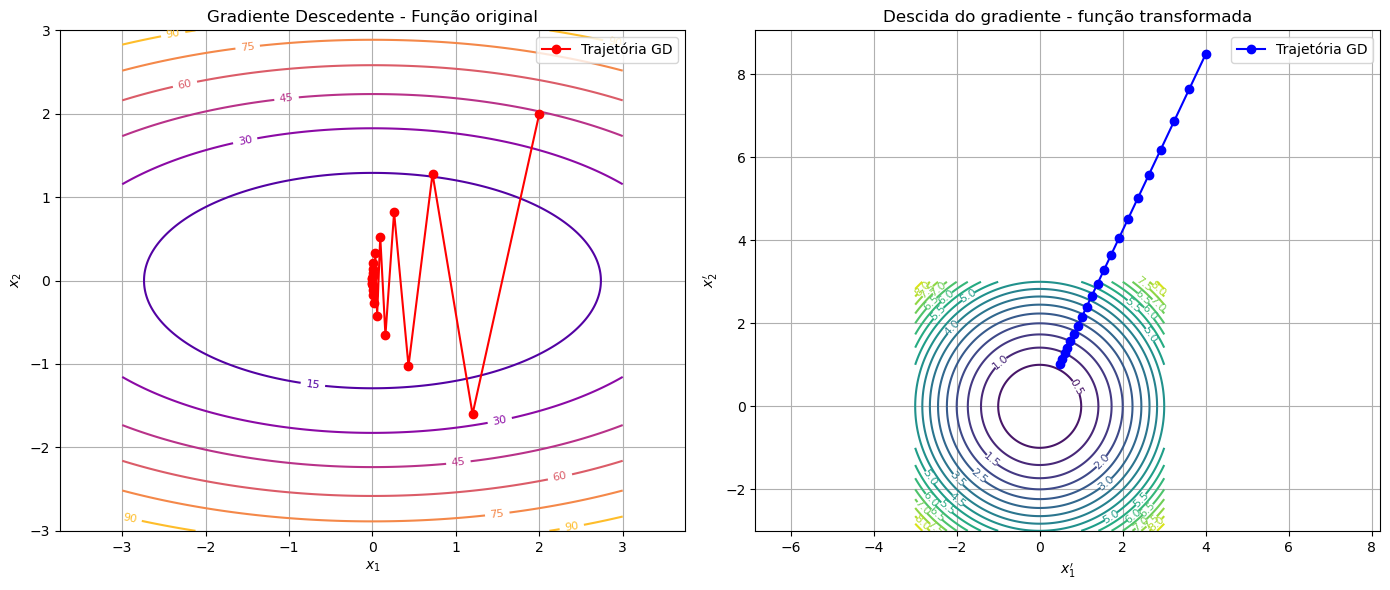

In [20]:
x_vals = np.linspace(-3, 3, 400)
y_vals = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z_orig = f_0231_original(X, Y)
Z_transf = f_transformed_0231(X, Y)

#Plot
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

#Função original
cs1 = axs[0].contour(X, Y, Z_orig, level=20, cmap='plasma')
axs[0].set_title('Gradiente Descedente - Função original')
axs[0].clabel(cs1, inline=True, fontsize=8)
axs[0].plot(x_origem[:, 0], x_origem[:, 1], 'ro-', label='Trajetória GD')
axs[0].set_xlabel('$x_1$')
axs[0].set_ylabel('$x_2$')
axs[0].legend()
axs[0].axis('equal')
axs[0].grid(True)

#Função transformada
cs2 = axs[1].contour(X, Y, Z_transf, levels=20, cmap='viridis')
axs[1].clabel(cs2, inline=True, fontsize=8)
axs[1].plot(x_transf[:, 0], x_transf[:, 1], 'bo-', label='Trajetória GD')
axs[1].set_title("Descida do gradiente - função transformada")
axs[1].set_xlabel("$x_1'$")
axs[1].set_ylabel("$x_2'$")
axs[1].legend()
axs[1].axis('equal')
axs[1].grid(True)

plt.tight_layout()
plt.show()

**Exercicio 2.2**


Conside a equação:

$f(x_1, x_2) = \frac{1}{3}x_{1}^3 + x_{2}^3 - x_1 - x_2$

O gradiente de $f(x_1, x_2)$:

$\nabla f(x_1, x_2) = \begin{pmatrix}
x_{1}^2 - 1 \\
3x_{2}^2 - 1
\end{pmatrix}$

E a matriz Hessiana:

$\nabla^2 f(x_1, x_2) = \begin{pmatrix}
2x_{1} & 0\\
0 & 6x_{2}
\end{pmatrix}$

In [21]:
def ex02_02(x):
    f = (1/3)*x[0]**3 + x[1]**3 - x[0] - x[1]
    g = np.array([ x[0] * x[0] - 1, 3 * x[1] * x[1] - 1])
    h = np.array([[2 * x[0], 0], [0, 6 * x[1]]])

    return f,g,h


Avaliar a função no ponto $x = \begin{pmatrix}
9\\
1
\end{pmatrix}$

In [22]:
x_val = np.array([9, 1])
f, g, h = ex02_02(x_val)
print(f)
print(g)
print(h)

234.0
[80  2]
[[18  0]
 [ 0  6]]


Plotando a função:

In [23]:
def function_plot(x, y):
    npx = np.array([x, y])
    return ex02_02(npx)[0]

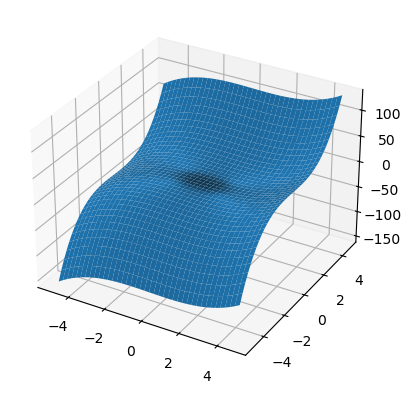

In [24]:
#Definindo os ranges de x1 e x2
x1 = np.arange(-5, 5, 0.25)
x2 = np.arange(-5, 5, 0.25)

X, Y = np.meshgrid(x1, x2)
Z = np.array([[function_plot(x,y) for x in x1]for y in x2])
fig =  plt.figure()
ax = plt.axes(projection = '3d')
ax.plot_surface(X, Y, Z, edgecolor='none')

Agora iremos considerar a direção $d = \begin{pmatrix}
-1\\
-1
\end{pmatrix}$

In [25]:
#Definindo a direção "d"
d = np.array([-1, -1])
def alpha_1d(alpha):
    the_x = x_val + alpha * d
    return ex02_02(the_x)[0]

Para plotar a função:

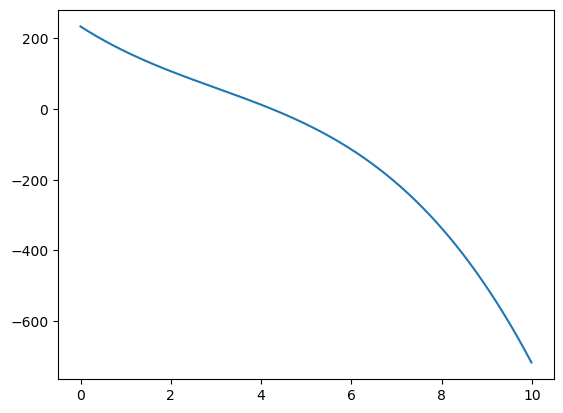

In [26]:
plot_alpha = np.arange(0, 10, 0.01)
fx = np.array([alpha_1d(alpha) for alpha in plot_alpha])
plt.plot(plot_alpha, fx)

In [27]:
#Derivada Direcional:
print(np.inner(g, d))

-82


In [28]:
#Calculando a curvatura
def curvature(h, d):
    return np.inner(d, h @ d)/np.inner(d, d)

In [29]:
print(curvature(h, d))

12.0


In [30]:
#Calculo dos autovalores e autovetores
eigenvalues, eigenvectors = np.linalg.eig(h)
print("Autovalores:\n", eigenvalues)
print("Autovetores:\n", eigenvectors)

Autovalores:
 [18.  6.]
Autovetores:
 [[1. 0.]
 [0. 1.]]


In [31]:
#Curvatura dos autovalores e autovetores
print(curvature(h,eigenvectors[0]))
print(curvature(h,eigenvectors[1]))

18.0
6.0
